In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [50]:
#Get Data
cols = ["frequency", "out_in", "V_out", "V_in"]
full_data = pd.read_csv("DataFiles/Day3_170pf_peak.csv", delimiter="\t", names=cols)
peak_data = pd.read_csv("DataFiles/Day3_101pf_peak.csv", delimiter="\t", names=cols)


full_data

,frequency,out_in,V_out,V_in
NaN,500.000000,8.483308,0.087522,0.742477
NaN,502.822421,8.554698,0.090477,0.774004
NaN,505.643719,8.626928,0.093638,0.807805
NaN,508.466527,8.702259,0.097003,0.844149
NaN,511.285926,8.778164,0.100620,0.883262
...,...,...,...,...
NaN,885.137057,7.173782,0.017294,0.124066
NaN,887.958595,6.988059,0.017526,0.122472
NaN,890.780865,6.809670,0.017756,0.120910
NaN,893.602824,6.636945,0.017984,0.119359


In [53]:
print((108.2 / 1347)**-1)
print((80.5 / 927.7)**-1)
print((77.1 / 726.1)**-1)

12.44916820702403
11.524223602484474
9.417639429312581


In [47]:
peak_data["out_in"].max()

6.090132

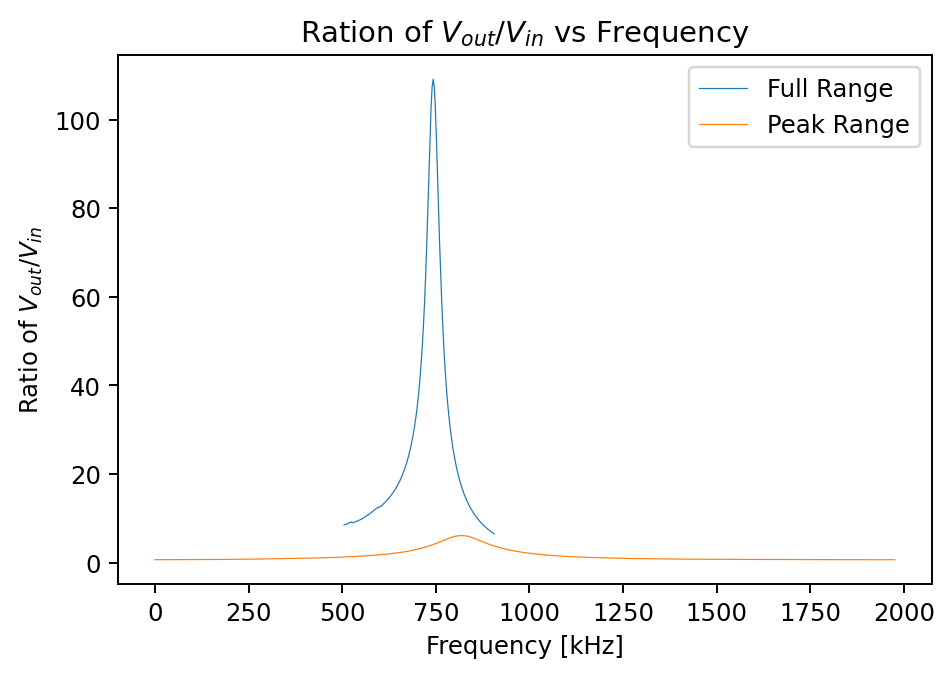

In [48]:
plt.figure(dpi=175)
plt.title("Ration of $V_{out}$/$V_{in}$ vs Frequency")
plt.xlabel("Frequency [kHz]")
plt.ylabel("Ratio of $V_{out}$/$V_{in}$")


plt.plot(1.01*full_data["frequency"], full_data["out_in"], lw=0.5, label="Full Range")
plt.plot(peak_data["frequency"], peak_data["out_in"], lw=0.5, label="Peak Range")

#plt.ylim(0,.05)

plt.legend()

plt.savefig("Plots/Both_101pf_Full.pdf")

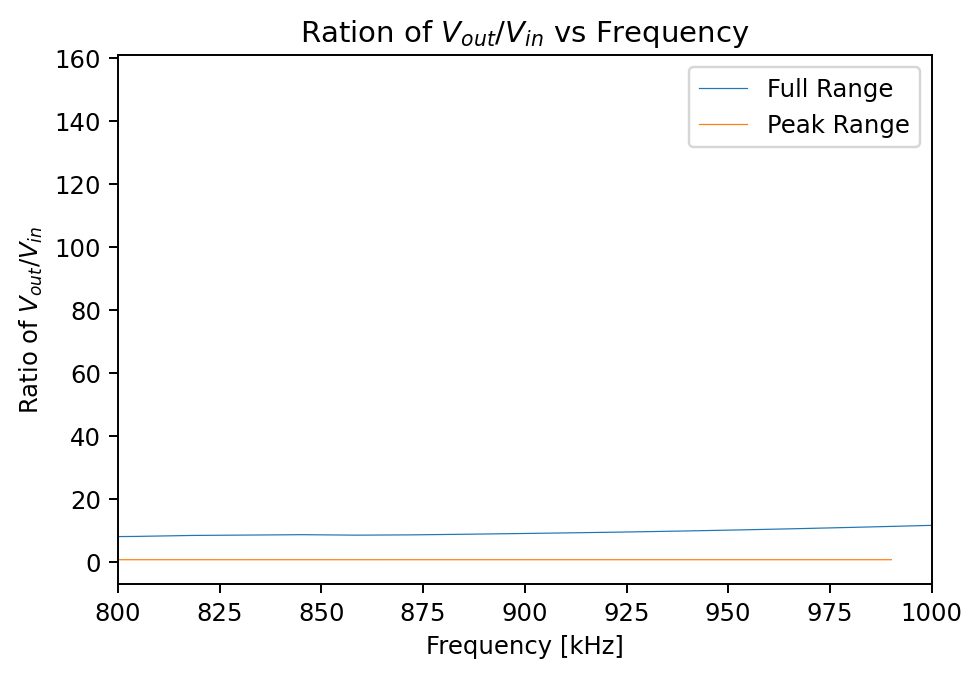

In [33]:
plt.figure(dpi=175)
plt.title("Ration of $V_{out}$/$V_{in}$ vs Frequency")
plt.xlabel("Frequency [kHz]")
plt.ylabel("Ratio of $V_{out}$/$V_{in}$")


plt.plot(1.01*full_data["frequency"], full_data["out_in"], lw=0.5, label="Full Range")
plt.plot(peak_data["frequency"], peak_data["out_in"], lw=0.5, label="Peak Range")

plt.xlim(800,1000)

plt.legend()

plt.savefig("Plots/Both_101pf_Ploeak.pdf")

[   9.9650771    14.09531496 1347.4535255     6.24157241]
[0.13534547 0.24465047 0.53087541 0.30431071]
[1.35819794 1.73568644 0.03939842 4.8755456 ]


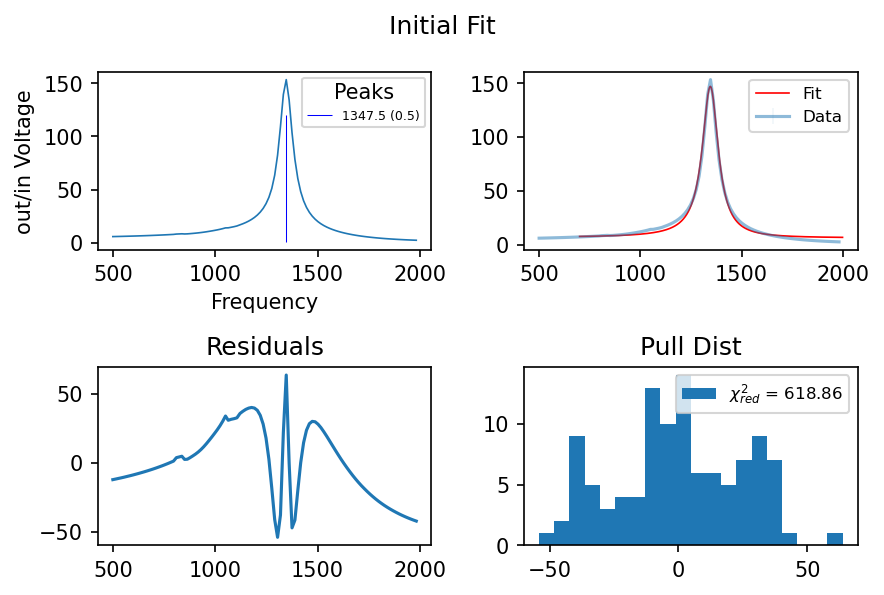

CPU times: user 631 ms, sys: 54.7 ms, total: 686 ms
Wall time: 711 ms


In [13]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def single_Gauss(x, A,mu1,sig1, d): 
    return A*gauss(x,mu1,sig1) + d

def resonance(x, A,Q,f0, d):
    g=x/f0
    s=(1-g**2)
    D=Q**2*s**2+g**2
    y=A*Q/D + d
    return y

func = resonance

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Frequency")
plt.ylabel("out/in Voltage")

keeps = full_data["frequency"] > -1

frequency = full_data["frequency"][keeps]
out_in = full_data["out_in"][keeps]

plt.plot(frequency, out_in, lw=.8)

errors = out_in.values*0 + .1


pars, cov = scipy.optimize.curve_fit(func, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
                                     p0=[3,20,1300, 1], #[3,460,20, 1],
                                     #bounds=([0.01,380,1, 0],
                                     #        [5,520,200, 1.5]))
                                    )
#Mean Lines
plt.vlines(pars[-2],1,120, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(700,2000,1)
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(frequency.values, 
             out_in.values, yerr=errors/10, ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, label="Fit")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (out_in.values-func(frequency.values, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(frequency.values, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
plt.savefig(f"Plots/Initial_Fit.pdf")
plt.show()

108.21748572626444